# Model development - Decision Trees
 
Required to predict the purchase would happen or not. 

## 1. Load required Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.tree.export import export_text 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Load the dataset

Let's load the dataset and have a look at all the variables available 

In [33]:
variable1 = pd.read_csv(r"C:\Users\aman.k\Desktop\_08022020\Module 3-13th Feb Assignment 2\6501242_MWM3NSP5.csv")
Df = pd.DataFrame(variable1)

In [34]:
Df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


#### Split Dataset into Features & Target variables

To clean & Transform predictor columns, let's separate dependent & independent variables.

In [35]:
feature_cols = ['User ID','Gender','Age','EstimatedSalary']
X = Df[feature_cols] # Features
y = Df.Purchased # Target variable

#### Label Encode Categorical values

In [36]:
categorical_cols = ['Gender']
le = LabelEncoder()             # instantiate labelencoder object
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
print("Label Encoded Columns:\n",X[categorical_cols].head(10))

Label Encoded Columns:
    Gender
0       1
1       1
2       0
3       0
4       1
5       1
6       0
7       0
8       1
9       0


#### Scale numeric values

In [37]:
scaler = MinMaxScaler()
X[['Age','EstimatedSalary']] = scaler.fit_transform(X[['Age','EstimatedSalary']])

#### Shuffling the data

In [38]:
seed = 42 
random_state_value=21 
X, y = shuffle(X, y, random_state=seed)

#### Split Dataset into training set & test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75% training and 25% test

## 4. Built Model

In [40]:
max_depth_value=3

In [41]:
min_samples_split_value=80

In [42]:
clf1 = DecisionTreeClassifier(max_depth=max_depth_value,
                              min_samples_split=min_samples_split_value,
                              random_state=random_state_value)
print("Decision Tree Parameters:\n",clf1)

Decision Tree Parameters:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=21, splitter='best')


#### Train Decision Tree Classifer with training dataset

Here the model uses traing data for learning 

In [43]:
clf1 = clf1.fit(X_train,y_train)

#### Predict response for training dataset

We shall evaluate model performance on trained dataset

In [44]:
y_train_pred = clf1.predict(X_train)

#### Predict the response for test dataset

The learnt model is used to predict the test/unseen data to measure its effectveness

In [45]:
y_pred = clf1.predict(X_test)

#### Evaluate Model Performance

# Q1. Check the accuracy of the model 

In [46]:
# Evaluate performance on Train set
print("\n\nPerformance on Train Set:")
print("Confusion Matrix:",metrics.confusion_matrix(y_train, y_train_pred))
print("\nAccuracy: {0:0.2f}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("Precision: {0:0.2f}".format(metrics.precision_score(y_train, y_train_pred, average="macro")))
print("Recall: {0:0.2f}".format(metrics.recall_score(y_train, y_train_pred, average="macro")))
print("f1 score: {0:0.2f}".format(metrics.f1_score(y_train, y_train_pred, average="macro")))  

print("\n\nPerformance on Test Set:")
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy:{0:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {0:0.2f}".format(metrics.precision_score(y_test, y_pred, average="macro")))
print("Recall: {0:0.2f}".format(metrics.recall_score(y_test, y_pred, average="macro"))) 
print("f1 score: {0:0.2f}".format(metrics.f1_score(y_test, y_pred, average="macro")))  



Performance on Train Set:
Confusion Matrix: [[179  20]
 [  7  94]]

Accuracy: 0.91
Precision: 0.89
Recall: 0.92
f1 score: 0.90


Performance on Test Set:
Confusion Matrix: [[53  5]
 [ 4 38]]

Accuracy:0.91
Precision: 0.91
Recall: 0.91
f1 score: 0.91


The below command helps us understand tree rules better!!

In [47]:
tree_rules = export_text(clf1, feature_names=list(X))
print("Tree Rules:\n:",tree_rules)

Tree Rules:
: |--- Age <= 0.58
|   |--- EstimatedSalary <= 0.58
|   |   |--- Age <= 0.56
|   |   |   |--- class: 0
|   |   |--- Age >  0.56
|   |   |   |--- class: 0
|   |--- EstimatedSalary >  0.58
|   |   |--- class: 1
|--- Age >  0.58
|   |--- Age <= 0.70
|   |   |--- class: 1
|   |--- Age >  0.70
|   |   |--- class: 1



In [48]:
print(y.value_counts())

0    257
1    143
Name: Purchased, dtype: int64


## 6. Rebuild Decision Tree Classifier 

In [49]:
max_depth_value=5  

In [50]:
min_samples_split_value=100  

In [52]:
clf2 = DecisionTreeClassifier(max_depth=max_depth_value,
                              min_samples_split=min_samples_split_value,
                              random_state=random_state_value,
                             class_weight={1: 2})
print("Decision Tree Parameters:\n",clf2)

Decision Tree Parameters:
 DecisionTreeClassifier(class_weight={1: 2}, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=21, splitter='best')


#### Train Decision Tree Classifer & Predicting response for trained dataset

In [53]:
clf2 = clf2.fit(X_train,y_train)

y_train_pred = clf2.predict(X_train)

y_pred = clf2.predict(X_test)

In [54]:
clf2 

y_train_pred 

y_pred 

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

#### Predict the response for test dataset

In [56]:
# Evaluate performance on Train set
print("\n\nPerformance on Train Set:")
print("Confusion Matrix:",metrics.confusion_matrix(y_train, y_train_pred))
print("\nAccuracy: {0:0.2f}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("Precision: {0:0.2f}".format(metrics.precision_score(y_train, y_train_pred, average="macro")))
print("Recall: {0:0.2f}".format(metrics.recall_score(y_train, y_train_pred, average="macro")))
print("f1 score: {0:0.2f}".format(metrics.f1_score(y_train, y_train_pred, average="macro")))  

print("\n\nPerformance on Test Set:")
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy:{0:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {0:0.2f}".format(metrics.precision_score(y_test, y_pred, average="macro")))
print("Recall: {0:0.2f}".format(metrics.recall_score(y_test, y_pred, average="macro"))) 
print("f1 score: {0:0.2f}".format(metrics.f1_score(y_test, y_pred, average="macro")))  



Performance on Train Set:
Confusion Matrix: [[172  27]
 [  4  97]]

Accuracy: 0.90
Precision: 0.88
Recall: 0.91
f1 score: 0.89


Performance on Test Set:
Confusion Matrix: [[50  8]
 [ 4 38]]

Accuracy:0.88
Precision: 0.88
Recall: 0.88
f1 score: 0.88


The below command helps us understand tree rules better!!

In [57]:
tree_rules = export_text(clf2, feature_names=list(X))
print("Tree Rules:\n:",tree_rules)

Tree Rules:
: |--- Age <= 0.56
|   |--- EstimatedSalary <= 0.58
|   |   |--- User ID <= 15577906.00
|   |   |   |--- class: 0
|   |   |--- User ID >  15577906.00
|   |   |   |--- EstimatedSalary <= 0.46
|   |   |   |   |--- class: 0
|   |   |   |--- EstimatedSalary >  0.46
|   |   |   |   |--- class: 0
|   |--- EstimatedSalary >  0.58
|   |   |--- class: 1
|--- Age >  0.56
|   |--- class: 1



In [58]:
#from sklearn.datasets import load_iris
from sklearn import tree
#X, y = load_iris(return_X_y=True)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, y)

[Text(186.0, 190.26, 'X[2] <= 0.583\ngini = 0.499\nsamples = 400\nvalue = [257, 286]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 0.552\ngini = 0.401\nsamples = 285\nvalue = [239, 92]'),
 Text(74.4, 81.53999999999999, 'X[2] <= 0.44\ngini = 0.122\nsamples = 238\nvalue = [230, 16]'),
 Text(37.2, 27.180000000000007, 'gini = 0.0\nsamples = 160\nvalue = [160, 0]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.303\nsamples = 78\nvalue = [70, 16]'),
 Text(148.8, 81.53999999999999, 'gini = 0.189\nsamples = 47\nvalue = [9, 76]'),
 Text(260.40000000000003, 135.9, 'X[2] <= 0.679\ngini = 0.155\nsamples = 115\nvalue = [18, 194]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.32\nsamples = 24\nvalue = [8, 32]'),
 Text(297.6, 81.53999999999999, 'gini = 0.11\nsamples = 91\nvalue = [10, 162]')]

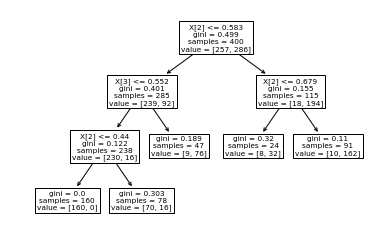

In [59]:
tree.plot_tree(clf2.fit(X, y)) 

# Q2. What is the % of Type II error?

[[179  20]    
 [  7  94]] 

## False Negative consider as a Type II error.

In [104]:
(7/(179+20+7+94))*100 

2.3333333333333335

[[172  27]
 [  4  97]]

In [105]:
(4/(172+27+4+97))*100

1.3333333333333335

# Q3. Calculate Cross-Entropy for the built model and interpret the same

In [60]:
# Create Decision Tree classifer object
clf123 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf123 = clf123.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf123.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


# Q4. Calculate Gini Index for the built model and interpret the same

In [61]:
# Create Decision Tree classifer object
clf1234 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf1234 = clf1234.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1234.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.91


# 5.Create a plot that shows the decision tree on training set and test set

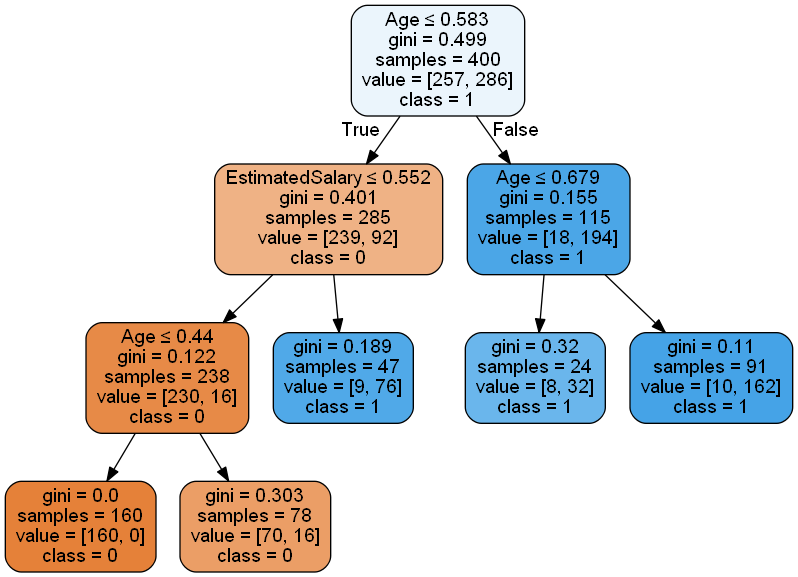

In [62]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree2.png')
Image(graph.create_png())